# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement
<br>We the good people property agents have decided to find the best model in prediction house prices in the Ames <br>area. You give us a price in mind, we give you what you can afford to have. 
<br>Already know what you want, let us know and we will give you the estimated price of your house!!

## Executive Summary



### Contents:
- [Importing the Relevant Libraries](#Importing-the-Relevant-Libraries)
- [Loading the Data](#Loading-the-Data)
- [Cleaning the Data](#Cleaning-the-Data)
- [Testing the idea of VIF to reveal collinearity between numerical features](#Testing-the-idea-of-VIF-to-reveal-collinearity-between-numerical-features)
- [Testing the idea of CHI-SQUARE test to reveal relationships between categorical features](#Testing-the-idea-of-CHI-SQUARE-test-to-reveal-relationships-between-categorical-features)
- [Finding our 𝑅2 with the linear regression](#Finding-our-𝑅2-with-the-linear-regression)
- [Find an optimal value for the ridge regression alpha usingRidgeCV.](#Find-an-optimal-value-for-the-ridge-regression-alpha-usingRidgeCV.)
- [Cross-validate the ridge regression  𝑅2  with the optimal alpha.](#Cross-validate-the-ridge-regression-𝑅2-with-the-optimal-alpha.)
- [Find an optimal value for lasso regression alpha using LassoCV.](#Find-an-optimal-value-for-lasso-regression-alpha-using-LassoCV.)
- [Cross-validate the lasso  𝑅2  with the optimal alpha.](#Cross-validate-the-lasso-𝑅2-with-the-optimal-alpha.)
- [Look at the coefficients for variables in the lasso.](#Look-at-the-coefficients-for-variables-in-the-lasso.)
- [Find an optimal value for elastic net regression alpha using ElasticNetCV.](#Find-an-optimal-value-for-elastic-net-regression-alpha-using-ElasticNetCV.)
- [Cross-validate the elastic net  𝑅2  with the optimal alpha and l1_ratio.](#Cross-validate-the-elastic-net-𝑅2-with-the-optimal-alpha-and-l1_ratio.)
- [CLEANING AND FITTING OUR MODEL to acual TEST values!!](#CLEANING-AND-FITTING-OUR-MODEL-to-acual-TEST-values!!)
- [Final Thoughts and Conclusion](#Final-Thoughts-and-Conclusion)


## Importing the Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
#import researchpy as rp           ### Don't import modules you don't use
from scipy import stats


## Loading the Data

---

Today's [dataset](`train.csv`),(`train.csv`)  is from Kaggle https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data. 



In [3]:
train_dst='./datasets/train.csv'
test_dst='./datasets/test.csv'
train= pd.read_csv(train_dst)
test=pd.read_csv(test_dst)


## Cleaning the Data

In [4]:
print(f"train shape:{train.shape}")

train shape:(2051, 81)


In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
#drop Id columns cause we wont need for analysis
train.drop("Id",axis=1,inplace=True)

In [7]:
train.drop("PID",axis=1,inplace=True)

In [8]:
train.shape

(2051, 79)

In [9]:
#to get a feel of how many null values in each column.
#drop columns in which %of nans compared to total data is significant
null=[]
for i in train.isnull().sum():
        null.append(i)                   ### or...... null = list(train.isnull().sum())

In [988]:
for i in null:
    if i !=0:
        print(f"{null.index(i)}: {i*100/2051}%")

2: 16.089712335446123%
5: 93.1740614334471%
24: 1.0726474890297415%
24: 1.0726474890297415%
29: 2.681618722574354%
29: 2.681618722574354%
31: 2.8278888347147735%
29: 2.681618722574354%
33: 0.04875670404680644%
34: 2.7303754266211606%
33: 0.04875670404680644%
33: 0.04875670404680644%
33: 0.04875670404680644%
46: 0.09751340809361288%
46: 0.09751340809361288%
56: 48.75670404680643%
57: 5.509507557289127%
58: 5.558264261335934%
58: 5.558264261335934%
33: 0.04875670404680644%
33: 0.04875670404680644%
58: 5.558264261335934%
58: 5.558264261335934%
71: 99.56118966357874%
72: 80.49731838127742%
73: 96.83081423695758%


In [989]:
#columns 5,56,71,72,73 has too much missing values so we drop,
#Alley,Fireplace Qu,Pool Qc,Fence,Misc Featrure
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [990]:
train.drop(['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)

In [991]:
#Now to tackle missing values where substituting mean value is useless
#Took some time to go through each column to decide what they are
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       2051 non-null object
Exterior 2nd      

In [992]:
# na lot frontage probably means theres none so we put zero
train.loc[:, "Lot Frontage"] = train.loc[:, "Lot Frontage"].fillna(0)

In [993]:
# MasVnrType/area na means no veneer
train.loc[:, "Mas Vnr Type"] = train.loc[:, "Mas Vnr Type"].fillna("None")
train.loc[:, "Mas Vnr Area"] = train.loc[:, "Mas Vnr Area"].fillna(0)

In [994]:
#All basement related stuff : na for basement means no basement,subsequently everything else
train.loc[:, "Bsmt Qual"] = train.loc[:, "Bsmt Qual"].fillna("No")
train.loc[:, "Bsmt Cond"]     = train.loc[:, "Bsmt Cond"].fillna("No")
train.loc[:, "Bsmt Exposure"]  = train.loc[:, "Bsmt Exposure"].fillna("No")
train.loc[:, "BsmtFin Type 1"] = train.loc[:, "BsmtFin Type 1"].fillna("No")
train.loc[:, "BsmtFin Type 2"] = train.loc[:, "BsmtFin Type 2"].fillna("No")
train.loc[:, "Bsmt Full Bath"] = train.loc[:, "Bsmt Full Bath"].fillna(0)
train.loc[:, "Bsmt Half Bath"] = train.loc[:, "Bsmt Half Bath"].fillna(0)
train.loc[:, "Bsmt Unf SF"]    = train.loc[:, "Bsmt Unf SF"].fillna(0)
train.loc[:, "Bsmt Full Bath"] = train.loc[:, "Bsmt Full Bath"].fillna(0)
train.loc[:, "Bsmt Half Bath"] = train.loc[:, "Bsmt Half Bath"].fillna(0)

In [995]:
# All Garage related stuff: na for no garage
train.loc[:, "Garage Type"] = train.loc[:, "Garage Type"].fillna("No")
train.loc[:, "Garage Finish"] = train.loc[:, "Garage Finish"].fillna("No")
train.loc[:, "Garage Qual"] = train.loc[:, "Garage Qual"].fillna("No")
train.loc[:, "Garage Cond"] = train.loc[:, "Garage Cond"].fillna("No")
train.loc[:, "Garage Area"] = train.loc[:, "Garage Area"].fillna(0)          ### Good
train.loc[:, "Garage Cars"] = train.loc[:, "Garage Cars"].fillna(0)

In [996]:
#check again  #whatever is left can add mean values in them 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       2051 non-null object
Exterior 2nd      

In [997]:
#Make the MOSOLD= Month Sold column look nice abit,
train = train.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

### There are 2 ways to treat this: 
### 1. Treat as a categorical variable, and use pd.get_dummies to pull 11 columns from the 12 months.
### 2. Treat this as a cyclic variable, and perform trigometric transforms to impose the correct 'distance measures'
###    on the data. i.e 11 should be as far from 2 as 5 is to 8.

In [998]:
#also the subclass shows numerical values, but they are actually categories only, so change
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}}) ### Good

In [999]:
#Just to see how many of each we have :)
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

print(f"Numerical features : {str(len(numerical_features))}")
print(f"Categorical features : {str(len(categorical_features))}")
train_num = train[numerical_features]
train_cat = train[categorical_features]


Numerical features : 37
Categorical features : 37


## EDA

## Testing the idea of VIF to reveal collinearity between numerical features

In [1000]:
#Replace remaining missing values with median
train_num = train_num.fillna(train_num.median())

In [1001]:
def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [1002]:
calculate_vif_(train_num)
#here we see 1st Flr SF has showed multicollinearity, can drop it from our numerical categories

dropping '1st Flr SF' at index: 12
Remaining variables:
Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,...,0,276,0,0,0,0,0,1,2008,298751
2047,30,0.0,12342,4,5,1940,1950,0.0,262.0,0.0,...,158,0,0,0,0,0,0,3,2009,82500
2048,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,...,0,0,0,0,0,0,0,3,2009,177000
2049,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,...,0,189,140,0,0,0,0,11,2009,144000


In [1003]:
train_num=train_num[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice']]

In [1004]:
train_num

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,...,0,276,0,0,0,0,0,1,2008,298751
2047,30,0.0,12342,4,5,1940,1950,0.0,262.0,0.0,...,158,0,0,0,0,0,0,3,2009,82500
2048,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,...,0,0,0,0,0,0,0,3,2009,177000
2049,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,...,0,189,140,0,0,0,0,11,2009,144000


## Testing the idea of CHI-SQUARE test to reveal relationships between categorical features

In [1005]:
#saving it to test some ideas elsewhere
train_num.to_csv('./datasets/train_num.csv',index=False)
train_cat.to_csv('./datasets/train_cat.csv',index=False)

In [1006]:
catcol=[i for i in train_cat.columns]

In [1007]:
#to see which categories have a relationship we set a threshold of 0.5, cramer's V value of 0.5
count=0
for combo in combinations(catcol, 2):
    table, results = rp.crosstab(train_cat[combo[0]], train_cat[combo[1]], prop= 'col', test= 'chi-square')
    if results['results'][1]<=0.05:
        if results['results'][2]>=0.5:
            count+=1
            print(f"{combo[0]} and {combo[1]} have a relationship")
            print(f"Cramer's V={results['results'][2]}")
print(count)


MS Zoning and Utilities have a relationship
Cramer's V=0.7072
MS Zoning and Neighborhood have a relationship
Cramer's V=0.5573
Neighborhood and Exter Qual have a relationship
Cramer's V=0.5136
Exterior 1st and Exterior 2nd have a relationship
Cramer's V=0.718
Exter Qual and Kitchen Qual have a relationship
Cramer's V=0.5535
Foundation and Bsmt Qual have a relationship
Cramer's V=0.5136
Bsmt Qual and BsmtFin Type 1 have a relationship
Cramer's V=0.5231
Garage Type and Garage Finish have a relationship
Cramer's V=0.6889
Garage Finish and Garage Qual have a relationship
Cramer's V=0.5924
Garage Finish and Garage Cond have a relationship
Cramer's V=0.5881
Garage Qual and Garage Cond have a relationship
Cramer's V=0.6747
11


In [1008]:
# based on this 
#if one thing can represent alot of things, then we can just keep that and drop the rest
# remove Utilities, Neighbourhood, Exterior 2nd, Kitchen Qual,Foundation,'Bsmt Cond', 'Bsmt Exposure','Garage Qual', 'Garage Cond',Garage Type 

In [1009]:
remove_cat=['Utilities','Neighborhood','Exterior 2nd','Kitchen Qual','Foundation','Bsmt Cond','Bsmt Exposure','Garage Qual','Garage Cond','Garage Type']
train_cat=train_cat.drop(remove_cat,axis=1)

In [1010]:
#get dummies !!!
train_cat = pd.get_dummies(train_cat)

In [1011]:
#get dummies !!!
train_cat = pd.get_dummies(train_cat)  ### repeating?


In [1012]:
train1 = pd.concat([train_num, train_cat], axis = 1)
print(f"New number of features : {str(train.shape[1])}")

New number of features : 74


In [1013]:
train1

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2047,30,0.0,12342,4,5,1940,1950,0.0,262.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2048,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2049,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,...,1,0,0,0,0,0,0,0,0,1


In [1014]:
# Find most important features to saleprice
print("Find most important features relative to target")
corr = abs(train1.corr())
corr.sort_values(["SalePrice"], ascending = False, inplace = True) ### Good, but note that this only looks for linear 
print(corr.SalePrice.head(30))                                     ### correlation. If there exists some other relation
print(corr.SalePrice.tail(15))                                     ### it won't appear here.

Find most important features relative to target
SalePrice               1.000000
Overall Qual            0.800207
Gr Liv Area             0.697038
Garage Area             0.649897
Garage Cars             0.647781
Total Bsmt SF           0.628754
Exter Qual_TA           0.600362
Bsmt Qual_Ex            0.586497
Year Built              0.571849
Year Remod/Add          0.550370
Full Bath               0.537969
Garage Yr Blt           0.513936
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Exter Qual_Ex           0.493861
Fireplaces              0.471093
BsmtFin Type 1_GLQ      0.463549
Bsmt Qual_TA            0.456979
Heating QC_Ex           0.453255
Exter Qual_Gd           0.446685
Garage Finish_Unf       0.432220
BsmtFin SF 1            0.423445
Garage Finish_Fin       0.422936
Mas Vnr Type_None       0.411170
Sale Type_New           0.358102
Heating QC_TA           0.343542
Exterior 1st_VinylSd    0.342146
Open Porch SF           0.333476
Wood Deck SF            0.32

In [1015]:
features=train1[[
'SalePrice',         
'Overall Qual',       
'Gr Liv Area',       
'Garage Area',        
'Garage Cars',        
'Total Bsmt SF',      
'Year Built',         
'Year Remod/Add',     
'Full Bath',          
'Garage Yr Blt',      
'TotRms AbvGrd',     
'Mas Vnr Area',
'Fireplaces'
]]

In [1016]:
features = features.fillna(features.median())

In [1017]:
#based on the features i would want to use, create a boxplot, and weed out the outliers before proceeding further

In [1018]:
def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,10)) # You'll want to specify your figsize
    fig.tight_layout(w_pad=2)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].boxplot(dataframe[column]) # feel free to add more settings
        ax[i].set_title('Histogram of '+str(column))
    
        # i need to set title for each subplot 
        # need x-axis that that states particapation rates
        # need y-axis that states frequency-count of states

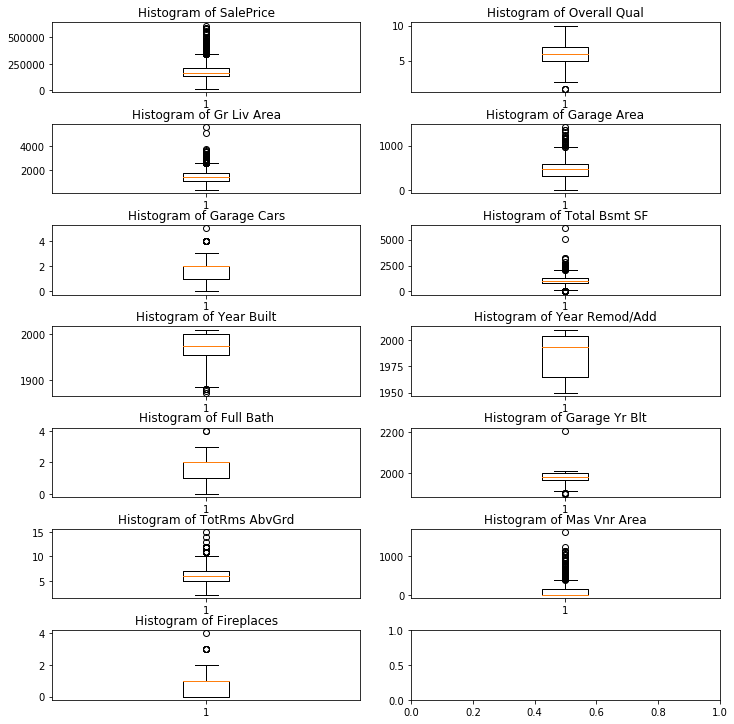

In [1019]:
subplot_boxplot(features,features.columns)  ### Neither a histogram nor a good visualisation. 
                                            ### Try changing the aspect ratios if you insist on using the box plots.
                                            ### Also, try to group features with the same scale onto the same plot

In [1020]:
#removing outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(features))
print(z)

[[0.64323737 0.0786441  0.04063369 ... 0.27944127 1.09232894 0.92570127]
 [0.48625217 0.62265614 1.24452887 ... 1.00273779 0.19149103 0.64081136]
 [0.91456726 0.77994434 0.88408407 ... 0.92053079 0.56590134 0.92570127]
 ...
 [0.05640761 0.0786441  0.82680107 ... 1.64382731 0.56590134 0.64081136]
 [0.47286744 1.48124458 0.59827032 ... 0.27944127 0.56590134 2.20732399]
 [0.09503233 0.62265614 0.60894303 ... 0.36164826 0.56590134 0.64081136]]


In [1021]:
#setting upper limit to be z=3
threshold = 3
print(np.where(z > 3))

(array([  12,   12,   30,   41,   52,   71,   78,   81,   81,   81,  108,
        125,  136,  138,  138,  138,  151,  178,  183,  190,  194,  199,
        217,  230,  257,  281,  328,  328,  328,  332,  332,  337,  359,
        378,  410,  465,  473,  475,  480,  480,  489,  489,  509,  520,
        529,  562,  616,  623,  623,  623,  628,  635,  682,  682,  685,
        685,  761,  765,  784,  786,  800,  800,  800,  823,  823,  823,
        839,  858,  858,  925,  925,  934,  951,  960,  960,  960,  960,
        960,  960,  986,  987, 1000, 1020, 1035, 1035, 1035, 1058, 1060,
       1081, 1117, 1117, 1117, 1134, 1147, 1151, 1158, 1158, 1164, 1164,
       1170, 1170, 1227, 1227, 1227, 1230, 1254, 1256, 1293, 1304, 1347,
       1372, 1389, 1409, 1416, 1420, 1428, 1433, 1433, 1503, 1557, 1563,
       1563, 1566, 1572, 1581, 1592, 1592, 1604, 1605, 1647, 1647, 1647,
       1671, 1671, 1692, 1692, 1692, 1699, 1700, 1700, 1700, 1729, 1737,
       1737, 1791, 1793, 1796, 1796, 1835, 1885, 1

In [1022]:
#exxample of an outlier in row 30 column 4
print(z[30][4]) #z[row][column]

0.2931123312711481


In [1023]:
#remove all outliers
features =features[(z < 3).all(axis=1)] ### This is called trimming/truncation. Might also want to consider Winsorization

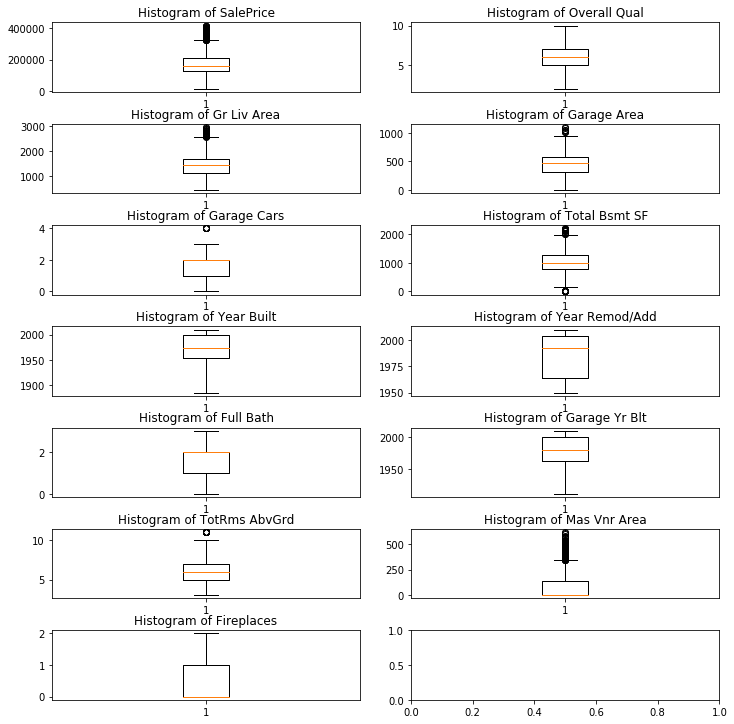

In [1024]:
#print out boxplot again
subplot_boxplot(features,features.columns)
#severe outliers removed

(13.0, 0.0)

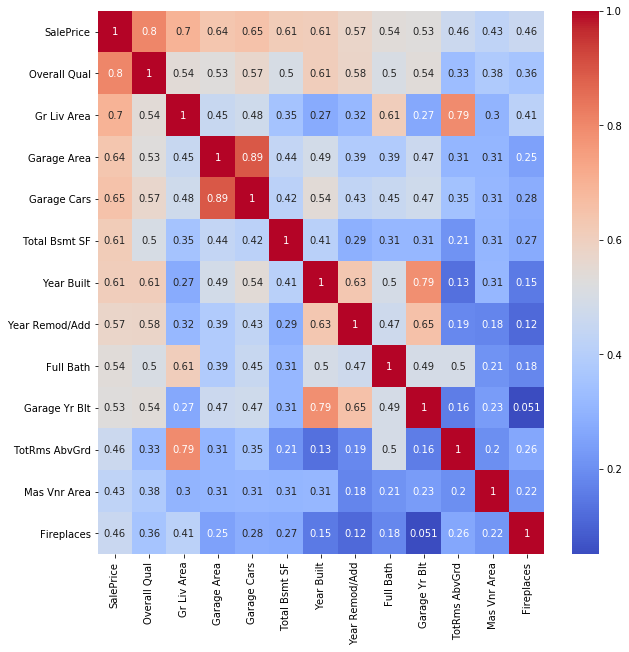

In [1025]:
fig, ax = plt.subplots(figsize=(10,10))     ### Slightly blurred due to the large figsize. Maybe set dpi. 
ax=sns.heatmap(features.corr(),annot=True,cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)   #there is a bug, so need to set ur own limits  ### good

In [1026]:
features.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,Garage Yr Blt,TotRms AbvGrd,Mas Vnr Area,Fireplaces
0,130500,6,1479,475.0,2.0,725.0,1976,2005,2,1976.0,6,289.0,0
1,220000,7,2122,559.0,2.0,913.0,1996,1997,2,1997.0,8,132.0,1
2,109000,5,1057,246.0,1.0,1057.0,1953,2007,1,1953.0,5,0.0,0
3,174000,5,1444,400.0,2.0,384.0,2006,2007,2,2007.0,7,0.0,0
4,138500,6,1445,484.0,2.0,676.0,1900,1993,2,1957.0,6,0.0,0


In [1027]:
calculate_vif_(features)

dropping 'Garage Yr Blt' at index: 9
Remaining variables:
Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces'],
      dtype='object')


,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Mas Vnr Area,Fireplaces
0,130500,6,1479,475.0,2.0,725.0,1976,2005,2,6,289.0,0
1,220000,7,2122,559.0,2.0,913.0,1996,1997,2,8,132.0,1
2,109000,5,1057,246.0,1.0,1057.0,1953,2007,1,5,0.0,0
3,174000,5,1444,400.0,2.0,384.0,2006,2007,2,7,0.0,0
4,138500,6,1445,484.0,2.0,676.0,1900,1993,2,6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,8,1728,520.0,2.0,1884.0,2007,2007,2,7,0.0,1
2047,82500,4,861,539.0,2.0,861.0,1940,1950,1,4,0.0,0
2048,177000,6,1913,342.0,2.0,896.0,1928,1950,1,9,0.0,1
2049,144000,4,1200,294.0,1.0,1200.0,1956,1956,1,6,0.0,2


In [1028]:
#we remove Garage Yr Blt and we will get our final features
features=features[['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces']]

## Finding our  𝑅2  with the linear regression

In [1029]:
X=features.drop('SalePrice',axis=1)
y=features[['SalePrice']]

In [1030]:
#lets start modeling FINALLY!!!
#train-test split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1552, 11)
X_test : (388, 11)
y_train : (1552, 1)
y_test : (388, 1)


In [1031]:
#scaling down our X values
ss = StandardScaler()
ss.fit(X_train)
X_scaled = ss.transform(X_train)

In [1032]:
X_test_sc=ss.transform(X_test)

In [1033]:
#A simple function that returns our rmse for both train and test
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train1_ss, y_train1, scoring = scorer, cv = 10))    
    print(rmse)                ### not actually necessary to function. 
    return(rmse.mean())

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test1_ss, y_test1, scoring = scorer, cv = 10))
    print(rmse)
    return(rmse.mean())


In [1034]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1035]:
#The R2 score using the liner regression on our train values
lr.score(X_scaled,y_train)

0.8457107973408627

In [1036]:
lr.coef_

array([[18751.42219257, 24513.31054805,  9777.18914576, -1449.48337648,
        12649.51081192,  7684.6386807 ,  8435.25898667, -3477.65089079,
        -2906.16377571,  3484.64298584,  6010.48996766]])

In [1037]:
#The R2 score using the liner regression on our test values
lr.score(X_test_sc,y_test)

0.819416272957639

In [1038]:
import statsmodels.api as sm

X1 = X_scaled
# manually add the intercept column:
X1 = sm.add_constant(X1)
y = y_train

model = sm.OLS(y, X1)
model = model.fit()
predictions = model.predict()

In [1039]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     767.4
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:58:32   Log-Likelihood:                -17987.
No. Observations:                1552   AIC:                         3.600e+04
Df Residuals:                    1540   BIC:                         3.606e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.744e+05    665.724    261.940      0.000    1.73e+05    1.76e+05
x1          1.875e+04   1094.911     17.126      0.000    1.66e+04    2.09e+04
x2          2.451e+04   1360.984     18.011      0.000    2.18e+04    2.72e+04
x3          9777.1891   1545.931      6.324      0.000    6744.837    1.28e+04
x4         -1449.4834   1624.444     -0.892      0.372   -4635.839    1736.872
x5          1.265e+04    809.377     15.629      0.000    1.11e+04    1.42e+04
x6          7684.6387   1039.027      7.396      0.000    5646.581    9722.696
x7          8435.2590    939.918      8.974      0.000    6591.605    1.03e+04
x8         -3477.6509    955.958     -3.638      0.000   -5352.768   -1602.534
x9         -2906.1638   1109.351     -2.620      0.009   -5082.161    -730.166
x10         3484.6430    740.556      4.705      0.000    2032.038    4937.248
x11         6010.4900    763.337      7.874      0.000    4513.199    7507.780
==============================================================================
Omnibus:                      203.226   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.761
Skew:                           0.722   Prob(JB):                    2.74e-112
Kurtosis:                       5.421   Cond. No.                         7.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1040]:
X.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces'],
      dtype='object')

In [1041]:
#from OLS regression we can see features 4 and 8 are above the confidence level of 0.05% rejecting our null hypo
#remove them from our useable features

In [1085]:
Xnew=features.drop(['SalePrice','Garage Cars','Full Bath','TotRms AbvGrd'],axis=1)
y=features[['SalePrice']]
Xnew.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Fireplaces'],
      dtype='object')

In [1089]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xnew, y, test_size = 0.2, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1552, 11)
X_test : (388, 11)
y_train : (1552, 1)
y_test : (388, 1)


In [1090]:
ss = StandardScaler()
ss.fit(X_train1)
X_train1_ss = ss.transform(X_train1)

In [1091]:
X_test1_ss=ss.transform(X_test1)

In [1046]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train1_ss, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1047]:
lr.score(X_train1_ss, y_train1)

0.8442169971690907

In [1048]:
lr.score(X_test1_ss, y_test1)

0.8169230681719182

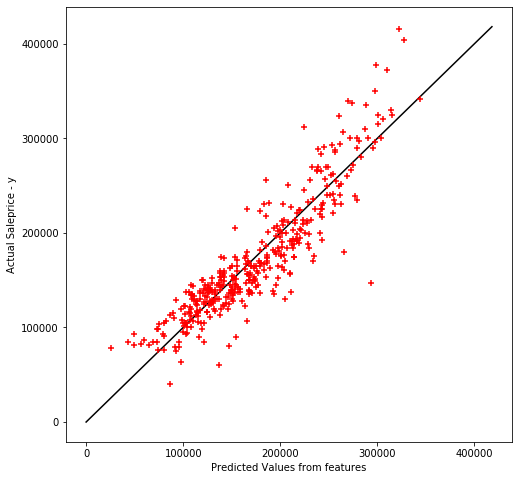

score:  0.8169230681719182


In [1049]:
predictions  =  lr.predict(X_test1_ss)
score        =  lr.score(X_test1_ss, y_test1)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test1, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features")
plt.ylabel("Actual Saleprice - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

print("score: ", score)


In [ ]:
### It's easier to see if you swap the axes, but your predictor is systematically underestimating house prices for
### houses with high sales prices (see the upward curve after y = 300k). Plotting residuals would make the
### behaviour much more obvious. 

In [1050]:
rmse_cv_train(lr)
#the root mean squared error of the train model is 28293

[27390.22312533 26582.32480984 23506.92360713 26940.25332734
 27451.53712407 24883.80892958 26795.93709808 30066.39937808
 23363.50371102 26671.64107395]


26365.255218443075

In [1051]:
rmse_cv_test(lr)
#the root mean squared error of the test model is 27342, slighly lower, suggesting the model performs better on the
#test values

[25399.73851264 23761.00696423 34755.49380334 22314.54399486
 25773.6042214  25146.28322426 33850.97526127 28293.55877957
 32232.36669729 19282.89722739]


27081.04686862538

In [ ]:
### Interpretation of train > test is that the model is overfit to the training data. 
### But doesn't look very significant in this case

In [1052]:
#the r_squared value is 0.881692, which suggests a good performance for our model.
#but could it be that our model is highly biased?
#next step is to add regularisation to penalise further any of the features used.
#will rmse improve ? we shall see

### Find an optimal value for the ridge regression alpha using`RidgeCV`.

In [1053]:
#Using the ridge regression
r_alphas = np.logspace(0, 5, 200)

best_ridge = RidgeCV(alphas=r_alphas, cv=10)
best_ridge.fit(X_train1_ss, y_train1)

print(best_ridge.alpha_)

9.54771611420806


---

### Cross-validate the ridge regression $R^2$ with the optimal alpha.


In [1054]:
ridge = Ridge(alpha=best_ridge.alpha_)

ridge_scores = cross_val_score(ridge,X_test1_ss, y_test1, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.80922429 0.8778148  0.6823332  0.87947012 0.83035919 0.8315334
 0.75875317 0.77373891 0.82035945 0.87980009]
0.8143386614795685


In [1055]:
rmse_cv_test(ridge)

[25454.54463053 23679.96464906 34593.98057471 22445.34331933
 25652.49857395 25259.09116231 33973.24005165 28169.4495062
 32265.17371178 19187.17100962]


27068.045718913025

In [1056]:
#The ridge regression performs slightly worse then our linear model itself.
#However our RMSE became slighly smaller as well.

###  Find an optimal value for lasso regression alpha using `LassoCV`.


In [1057]:
best_lasso = LassoCV(n_alphas=500, cv=10, verbose=1) #instead of using np.linspace(0,5,500)=alpha, let python do it auto
# n_alphas gets the number of alphas along the regularization path
best_lasso.fit(X_test1_ss, y_test1)

print(best_lasso.alpha_)

/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

455.4071536970809


..........................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


### Cross-validate the lasso $R^2$ with the optimal alpha.

In [1099]:
lasso = Lasso(best_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_test1_ss, y_test1, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.81087916 0.87848978 0.68688994 0.88005495 0.82911851 0.83206387
 0.75911956 0.7754048  0.81830935 0.87780765]
0.8148137565281477


In [1100]:
rmse_cv_test(lasso)

[25343.90261789 23614.46734002 34344.96918749 22390.82244366
 25746.13379559 25219.29177674 33947.4320481  28065.55641558
 32448.76072061 19345.54066315]


27046.687700883667

### Look at the coefficients for variables in the lasso.




In [1101]:
lasso.fit(X_test1_ss, y_test1)

Lasso(alpha=455.4071536970809, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1102]:
lasso_coefs = pd.DataFrame({'variable':X_test1.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
0,Overall Qual,20693.520278,20693.520278
1,Gr Liv Area,14833.416549,14833.416549
3,Total Bsmt SF,10262.152244,10262.152244
7,Fireplaces,9658.666433,9658.666433
5,Year Remod/Add,8561.213798,8561.213798
4,Year Built,7922.014814,7922.014814
2,Garage Area,7470.626827,7470.626827
6,Mas Vnr Area,3153.027981,3153.027981


###  Find an optimal value for elastic net regression alpha using `ElasticNetCV`.

In [1062]:
l1_ratios = np.linspace(0.01, 1.0, 25)

best_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
best_enet.fit(X_test1_ss, y_test1)

print(best_enet.alpha_)
print(best_enet.l1_ratio_)

/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

457.25761452496386
1.0


.........................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.1s finished


### Cross-validate the elastic net $R^2$ with the optimal alpha and l1_ratio.

In [1063]:
enet = ElasticNet(alpha=best_enet.alpha_, l1_ratio=best_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_test1_ss, y_test1, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.81087917 0.87848988 0.68692088 0.88005483 0.82912147 0.83206402
 0.75911449 0.77539699 0.8182926  0.87780831]
0.8148142642726277


In [1064]:
rmse_cv_test(enet)

[25343.90190422 23614.45747036 34343.27239074 22390.83435428
 25745.91052483 25219.28044684 33947.78886569 28066.04409476
 32450.25619126 19345.4886086 ]


27046.723485158185

In [1065]:
# Elastic net performs the same as our lasso. This is not surprising as our alpha value is 1, which is essentially Lasso.

In [1066]:
# We compare our Lasso and Ridge Models
# R2 values :    Lasso: 0.814812796474708   Ridge: 0.8143386614795685
# RMSE values:   Lasso: 27046.723485158185  Ridge: 27068.045718913025

#The lasso model performed slightly better then our Ridge models, hence for our actual test values, we will be fitting it 
#our lasso regression model
#Also the lasso regression removes the TotRms AbvGrd feature, as it has zero effect on saleprice, so for test model we shall not use this

In [1067]:
#now we can test our model on the test variables !

## CLEANING AND FITTING OUR MODEL to acual TEST values!!

In [1068]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [1069]:
Xnew.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF',
       'Year Built', 'Year Remod/Add', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces'],
      dtype='object')

In [1070]:
#we just filter out the columns that we want based on our model, and work with it
test1=test[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF',
       'Year Built', 'Year Remod/Add','Mas Vnr Area',
       'Fireplaces']]

In [1071]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 8 columns):
Overall Qual      879 non-null int64
Gr Liv Area       879 non-null int64
Garage Area       879 non-null int64
Total Bsmt SF     879 non-null int64
Year Built        879 non-null int64
Year Remod/Add    879 non-null int64
Mas Vnr Area      878 non-null float64
Fireplaces        879 non-null int64
dtypes: float64(1), int64(7)
memory usage: 55.1 KB


In [1072]:
#Just to see how many of each we have :)
categorical_features1 = test1.select_dtypes(include = ["object"]).columns
numerical_features1 = test1.select_dtypes(exclude = ["object"]).columns

print(f"Numerical features : {str(len(numerical_features1))}")
print(f"Categorical features : {str(len(categorical_features1))}")
test_num = test1[numerical_features1]
test_cat = test1[categorical_features1]

Numerical features : 8
Categorical features : 0


In [1073]:
#Replace remaining missing values with median
test_num = test_num.fillna(test_num.median())

In [1074]:
test_cat.isnull().sum()

Series([], dtype: float64)

In [1075]:
test2 = test_num.join(test_cat)
print(f"New number of features : {str(test.shape[1])}")

New number of features : 80


In [1076]:
test2

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Year Built,Year Remod/Add,Mas Vnr Area,Fireplaces
0,6,1928,440,1020,1910,1950,0.0,0
1,5,1967,580,1967,1977,1977,0.0,0
2,7,1496,426,654,2006,2006,0.0,1
3,5,968,480,968,1923,2006,0.0,0
4,6,1394,514,1394,1963,1963,247.0,2
...,...,...,...,...,...,...,...,...
874,6,1877,488,1084,1974,1974,0.0,1
875,6,1988,480,1104,1966,1999,410.0,1
876,5,1211,322,952,1968,1968,0.0,1
877,4,864,528,864,1971,1971,0.0,0


In [1077]:
#now we can filter out based on our model features
X3=test2

In [1079]:
X3

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Year Built,Year Remod/Add,Mas Vnr Area,Fireplaces
0,6,1928,440,1020,1910,1950,0.0,0
1,5,1967,580,1967,1977,1977,0.0,0
2,7,1496,426,654,2006,2006,0.0,1
3,5,968,480,968,1923,2006,0.0,0
4,6,1394,514,1394,1963,1963,247.0,2
...,...,...,...,...,...,...,...,...
874,6,1877,488,1084,1974,1974,0.0,1
875,6,1988,480,1104,1966,1999,410.0,1
876,5,1211,322,952,1968,1968,0.0,1
877,4,864,528,864,1971,1971,0.0,0


In [ ]:
### You might want to standardise the names of the features so that they port well to other programs.
### I recall SQL preferring lower case, joined by underscores instead of spaces.

In [1087]:
#scale features 1,then plug it into our ridge model!
ss = StandardScaler()
ss.fit(X3)
Xtest_scaled = ss.transform(X3)


In [1092]:
#Using the LASSO model here to get predicted y values!
lasso.fit(X_test1_ss, y_test1)
y_hat_ridge = lasso.predict(Xtest_scaled)

print(y_hat_ridge)


[142746.30889722 185683.07127535 198879.98715763 127118.91743768
 191462.6871243   97009.82759877 116309.64653206 142031.95420857
 198598.60005467 187250.71673962 167007.57238474 135053.96266599
 163353.22190479 273069.82108066 165973.42750657 131028.9988758
 175613.5749304  115455.03301515 206209.92044213 186640.09028444
 148720.87634689 121490.8795148  205895.14169994 169499.32193676
 196221.30422219 115634.27298174 138095.32483567 115507.43266048
 138897.66529285  39247.52277654 111221.79528154  93477.09903494
 227306.86987506 161760.20088057 225291.99420522 184362.78367203
 127817.82622852  70793.19682533 105637.65948622 199902.37557912
 167439.379603   211984.72513411 152505.58283032 167531.25512949
 230210.66452836 123198.81384235 219833.72525396 111069.02761846
 125473.96725322 117334.10232475 100925.91732543 189132.17212183
 259549.45101104 127206.38661606  98499.72850354 155434.8134287
 151750.68511132 153347.90664572 184714.86483527 228154.35180209
 281914.06586182 113142.935

In [1093]:
df2 = pd.DataFrame(y_hat_ridge,columns=['SalePrice'])

In [1094]:
df2['Id']=test['Id']

In [1095]:
df2=df2[['Id','SalePrice']]

In [1096]:
df2

,Id,SalePrice
0,2658,142746.308897
1,2718,185683.071275
2,2414,198879.987158
3,1989,127118.917438
4,625,191462.687124
...,...,...
874,1662,185710.017798
875,1234,204356.979918
876,1373,138411.557528
877,1672,106068.091355


In [1097]:
df2.to_csv('./datasets/y_hat_lasso2.csv',index=False)

## Final Thoughts and Conclusion

Our initial EDA and Feature selection initially gave us the following features to be used in our model
<br>'SalePrice',         
<br>'Overall Qual',       
<br>'Gr Liv Area',       
<br>'Garage Area',        
<br>'Garage Cars',        
<br>'Total Bsmt SF',      
<br>'Year Built',         
<br>'Year Remod/Add',     
<br>'Full Bath',          
<br>'Garage Yr Blt',      
<br>'TotRms AbvGrd',     
<br>'Mas Vnr Area',
<br>'Fireplaces'
<br>
<br>An initial linear regression using the OLS model revealed that 'Garage Cars' and 'Full Baths' play insignificant <br>roles in affecting our sale price
<br>
<br>Those two columns were removed, and finally we did one more VIF test to look for multicollinearity and we dropped <br>'Garage Yr Blt' as well




A linear regression ,followed by a ridge and lasso regularisation was done, and in the end it was shown that while
<br>Lasso had a slighly lower score then the linear regression model, Its RMSE value is lower.  Hence we chose it as <br>the model of choice going forward.
<br> Lasso also showed us that 'TotRms AbvGrd' place no role in predicting our sale prices, hence penalising it by <br>giving it a zero coefficient. We then can ignore this feature in our final test

In [1103]:
lasso_coefs

,variable,coef,abs_coef
0,Overall Qual,20693.520278,20693.520278
1,Gr Liv Area,14833.416549,14833.416549
3,Total Bsmt SF,10262.152244,10262.152244
7,Fireplaces,9658.666433,9658.666433
5,Year Remod/Add,8561.213798,8561.213798
4,Year Built,7922.014814,7922.014814
2,Garage Area,7470.626827,7470.626827
6,Mas Vnr Area,3153.027981,3153.027981


Finally as a business perspective. With our model we can estimate the price of the home we want to buy, based on the 7 features.
<br>Conversely given a particular budget, we can make changes go our importance of features accordingly, ie at the 
<br>price point, maybe we should think about lowering our expectations on overall quality, or the size of living area


In [ ]:
# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement
<br>We the good people property agents have decided to find the best model in prediction house prices in the Ames <br>area. You give us a price in mind, we give you what you can afford to have. 
<br>Already know what you want, let us know and we will give you the estimated price of your house!!

## Executive Summary



### Contents:
- [Importing the Relevant Libraries](#Importing-the-Relevant-Libraries)
- [Loading the Data](#Loading-the-Data)
- [Cleaning the Data](#Cleaning-the-Data)
- [Testing the idea of VIF to reveal collinearity between numerical features](#Testing-the-idea-of-VIF-to-reveal-collinearity-between-numerical-features)
- [Testing the idea of CHI-SQUARE test to reveal relationships between categorical features](#Testing-the-idea-of-CHI-SQUARE-test-to-reveal-relationships-between-categorical-features)
- [Finding our 𝑅2 with the linear regression](#Finding-our-𝑅2-with-the-linear-regression)
- [Find an optimal value for the ridge regression alpha usingRidgeCV.](#Find-an-optimal-value-for-the-ridge-regression-alpha-usingRidgeCV.)
- [Cross-validate the ridge regression  𝑅2  with the optimal alpha.](#Cross-validate-the-ridge-regression-𝑅2-with-the-optimal-alpha.)
- [Find an optimal value for lasso regression alpha using LassoCV.](#Find-an-optimal-value-for-lasso-regression-alpha-using-LassoCV.)
- [Cross-validate the lasso  𝑅2  with the optimal alpha.](#Cross-validate-the-lasso-𝑅2-with-the-optimal-alpha.)
- [Look at the coefficients for variables in the lasso.](#Look-at-the-coefficients-for-variables-in-the-lasso.)
- [Find an optimal value for elastic net regression alpha using ElasticNetCV.](#Find-an-optimal-value-for-elastic-net-regression-alpha-using-ElasticNetCV.)
- [Cross-validate the elastic net  𝑅2  with the optimal alpha and l1_ratio.](#Cross-validate-the-elastic-net-𝑅2-with-the-optimal-alpha-and-l1_ratio.)
- [CLEANING AND FITTING OUR MODEL to acual TEST values!!](#CLEANING-AND-FITTING-OUR-MODEL-to-acual-TEST-values!!)
- [Final Thoughts and Conclusion](#Final-Thoughts-and-Conclusion)


## Importing the Relevant Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy import stats


## Loading the Data

---

Today's [dataset](`train.csv`),(`train.csv`)  is from Kaggle https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data. 



train_dst='./datasets/train.csv'
test_dst='./datasets/test.csv'
train= pd.read_csv(train_dst)
test=pd.read_csv(test_dst)


## Cleaning the Data

print(f"train shape:{train.shape}")

train.head()

#drop Id columns cause we wont need for analysis
train.drop("Id",axis=1,inplace=True)

train.drop("PID",axis=1,inplace=True)

train.shape

#to get a feel of how many null values in each column.
#drop columns in which %of nans compared to total data is significant
null=[]
for i in train.isnull().sum():
        null.append(i)

for i in null:
    if i !=0:
        print(f"{null.index(i)}: {i*100/2051}%")

#columns 5,56,71,72,73 has too much missing values so we drop,
#Alley,Fireplace Qu,Pool Qc,Fence,Misc Featrure
train.columns

train.drop(['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)

#Now to tackle missing values where substituting mean value is useless
#Took some time to go through each column to decide what they are
train.info()

# na lot frontage probably means theres none so we put zero
train.loc[:, "Lot Frontage"] = train.loc[:, "Lot Frontage"].fillna(0)

# MasVnrType/area na means no veneer
train.loc[:, "Mas Vnr Type"] = train.loc[:, "Mas Vnr Type"].fillna("None")
train.loc[:, "Mas Vnr Area"] = train.loc[:, "Mas Vnr Area"].fillna(0)

#All basement related stuff : na for basement means no basement,subsequently everything else
train.loc[:, "Bsmt Qual"] = train.loc[:, "Bsmt Qual"].fillna("No")
train.loc[:, "Bsmt Cond"] = train.loc[:, "Bsmt Cond"].fillna("No")
train.loc[:, "Bsmt Exposure"] = train.loc[:, "Bsmt Exposure"].fillna("No")
train.loc[:, "BsmtFin Type 1"] = train.loc[:, "BsmtFin Type 1"].fillna("No")
train.loc[:, "BsmtFin Type 2"] = train.loc[:, "BsmtFin Type 2"].fillna("No")
train.loc[:, "Bsmt Full Bath"] = train.loc[:, "Bsmt Full Bath"].fillna(0)
train.loc[:, "Bsmt Half Bath"] = train.loc[:, "Bsmt Half Bath"].fillna(0)
train.loc[:, "Bsmt Unf SF"] = train.loc[:, "Bsmt Unf SF"].fillna(0)
train.loc[:, "Bsmt Full Bath"] = train.loc[:, "Bsmt Full Bath"].fillna(0)
train.loc[:, "Bsmt Half Bath"] = train.loc[:, "Bsmt Half Bath"].fillna(0)

# All Garage related stuff: na for no garage
train.loc[:, "Garage Type"] = train.loc[:, "Garage Type"].fillna("No")
train.loc[:, "Garage Finish"] = train.loc[:, "Garage Finish"].fillna("No")
train.loc[:, "Garage Qual"] = train.loc[:, "Garage Qual"].fillna("No")
train.loc[:, "Garage Cond"] = train.loc[:, "Garage Cond"].fillna("No")
train.loc[:, "Garage Area"] = train.loc[:, "Garage Area"].fillna(0)
train.loc[:, "Garage Cars"] = train.loc[:, "Garage Cars"].fillna(0)

#check again  #whatever is left can add mean values in them 
train.info()

#Make the MOSOLD= Month Sold column look nice abit,
train = train.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

#also the subclass shows numerical values, but they are actually categories only, so change
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

#Just to see how many of each we have :)
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

print(f"Numerical features : {str(len(numerical_features))}")
print(f"Categorical features : {str(len(categorical_features))}")
train_num = train[numerical_features]
train_cat = train[categorical_features]


## EDA

## Testing the idea of VIF to reveal collinearity between numerical features

#Replace remaining missing values with median
train_num = train_num.fillna(train_num.median())

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

calculate_vif_(train_num)
#here we see 1st Flr SF has showed multicollinearity, can drop it from our numerical categories

train_num=train_num[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice']]

train_num

## Testing the idea of CHI-SQUARE test to reveal relationships between categorical features

#saving it to test some ideas elsewhere
train_num.to_csv('./datasets/train_num.csv',index=False)
train_cat.to_csv('./datasets/train_cat.csv',index=False)

catcol=[i for i in train_cat.columns]

#to see which categories have a relationship we set a threshold of 0.5, cramer's V value of 0.5
count=0
for combo in combinations(catcol, 2):
    table, results = rp.crosstab(train_cat[combo[0]], train_cat[combo[1]], prop= 'col', test= 'chi-square')
    if results['results'][1]<=0.05:
        if results['results'][2]>=0.5:
            count+=1
            print(f"{combo[0]} and {combo[1]} have a relationship")
            print(f"Cramer's V={results['results'][2]}")
print(count)


# based on this 
#if one thing can represent alot of things, then we can just keep that and drop the rest
# remove Utilities, Neighbourhood, Exterior 2nd, Kitchen Qual,Foundation,'Bsmt Cond', 'Bsmt Exposure','Garage Qual', 'Garage Cond',Garage Type 

remove_cat=['Utilities','Neighborhood','Exterior 2nd','Kitchen Qual','Foundation','Bsmt Cond','Bsmt Exposure','Garage Qual','Garage Cond','Garage Type']
train_cat=train_cat.drop(remove_cat,axis=1)

#get dummies !!!
train_cat = pd.get_dummies(train_cat)

#get dummies !!!
train_cat = pd.get_dummies(train_cat)


train1 = pd.concat([train_num, train_cat], axis = 1)
print(f"New number of features : {str(train.shape[1])}")

train1

# Find most important features to saleprice
print("Find most important features relative to target")
corr = abs(train1.corr())
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(30))
print(corr.SalePrice.tail(15))

features=train1[[
'SalePrice',         
'Overall Qual',       
'Gr Liv Area',       
'Garage Area',        
'Garage Cars',        
'Total Bsmt SF',      
'Year Built',         
'Year Remod/Add',     
'Full Bath',          
'Garage Yr Blt',      
'TotRms AbvGrd',     
'Mas Vnr Area',
'Fireplaces'
]]

features = features.fillna(features.median())

#based on the features i would want to use, create a boxplot, and weed out the outliers before proceeding further

def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,10)) # You'll want to specify your figsize
    fig.tight_layout(w_pad=2)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].boxplot(dataframe[column]) # feel free to add more settings
        ax[i].set_title('Histogram of '+str(column))
    
        # i need to set title for each subplot 
        # need x-axis that that states particapation rates
        # need y-axis that states frequency-count of states

subplot_boxplot(features,features.columns)

#removing outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(features))
print(z)

#setting upper limit to be z=3
threshold = 3
print(np.where(z > 3))

#exxample of an outlier in row 30 column 4
print(z[30][4]) #z[row][column]

#remove all outliers
features =features[(z < 3).all(axis=1)]

#print out boxplot again
subplot_boxplot(features,features.columns)
#severe outliers removed

fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(features.corr(),annot=True,cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)   #there is a bug, so need to set ur own limits

features.head()

calculate_vif_(features)

#we remove Garage Yr Blt and we will get our final features
features=features[['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces']]

## Finding our  𝑅2  with the linear regression

X=features.drop('SalePrice',axis=1)
y=features[['SalePrice']]

#lets start modeling FINALLY!!!
#train-test split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

#scaling down our X values
ss = StandardScaler()
ss.fit(X_train)
X_scaled = ss.transform(X_train)

X_test_sc=ss.transform(X_test)

#A simple function that returns our rmse for both train and test
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train1_ss, y_train1, scoring = scorer, cv = 10))
    print(rmse)
    return(rmse.mean())

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test1_ss, y_test1, scoring = scorer, cv = 10))
    print(rmse)
    return(rmse.mean())


# Linear Regression
lr = LinearRegression()
lr.fit(X_scaled, y_train)

#The R2 score using the liner regression on our train values
lr.score(X_scaled,y_train)

lr.coef_

#The R2 score using the liner regression on our test values
lr.score(X_test_sc,y_test)

import statsmodels.api as sm

X1 = X_scaled
# manually add the intercept column:
X1 = sm.add_constant(X1)
y = y_train

model = sm.OLS(y, X1)
model = model.fit()
predictions = model.predict()

model.summary()

X.columns

#from OLS regression we can see features 4 and 8 are above the confidence level of 0.05% rejecting our null hypo
#remove them from our useable features

Xnew=features.drop(['SalePrice','Garage Cars','Full Bath','TotRms AbvGrd'],axis=1)
y=features[['SalePrice']]
Xnew.columns

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xnew, y, test_size = 0.2, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

ss = StandardScaler()
ss.fit(X_train1)
X_train1_ss = ss.transform(X_train1)

X_test1_ss=ss.transform(X_test1)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train1_ss, y_train1)

lr.score(X_train1_ss, y_train1)

lr.score(X_test1_ss, y_test1)

predictions  =  lr.predict(X_test1_ss)
score        =  lr.score(X_test1_ss, y_test1)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test1, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features")
plt.ylabel("Actual Saleprice - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

print("score: ", score)


rmse_cv_train(lr)
#the root mean squared error of the train model is 28293

rmse_cv_test(lr)
#the root mean squared error of the test model is 27342, slighly lower, suggesting the model performs better on the
#test values

#the r_squared value is 0.881692, which suggests a good performance for our model.
#but could it be that our model is highly biased?
#next step is to add regularisation to penalise further any of the features used.
#will rmse improve ? we shall see

### Find an optimal value for the ridge regression alpha using`RidgeCV`.

#Using the ridge regression
r_alphas = np.logspace(0, 5, 200)

best_ridge = RidgeCV(alphas=r_alphas, cv=10)
best_ridge.fit(X_train1_ss, y_train1)

print(best_ridge.alpha_)

---

### Cross-validate the ridge regression $R^2$ with the optimal alpha.


ridge = Ridge(alpha=best_ridge.alpha_)

ridge_scores = cross_val_score(ridge,X_test1_ss, y_test1, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

rmse_cv_test(ridge)

#The ridge regression performs slightly worse then our linear model itself.
#However our RMSE became slighly smaller as well.

###  Find an optimal value for lasso regression alpha using `LassoCV`.


best_lasso = LassoCV(n_alphas=500, cv=10, verbose=1) #instead of using np.linspace(0,5,500)=alpha, let python do it auto
# n_alphas gets the number of alphas along the regularization path
best_lasso.fit(X_test1_ss, y_test1)

print(best_lasso.alpha_)

### Cross-validate the lasso $R^2$ with the optimal alpha.

lasso = Lasso(best_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_test1_ss, y_test1, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

rmse_cv_test(lasso)

### Look at the coefficients for variables in the lasso.




lasso.fit(X_test1_ss, y_test1)

lasso_coefs = pd.DataFrame({'variable':X_test1.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

###  Find an optimal value for elastic net regression alpha using `ElasticNetCV`.

l1_ratios = np.linspace(0.01, 1.0, 25)

best_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
best_enet.fit(X_test1_ss, y_test1)

print(best_enet.alpha_)
print(best_enet.l1_ratio_)

### Cross-validate the elastic net $R^2$ with the optimal alpha and l1_ratio.

enet = ElasticNet(alpha=best_enet.alpha_, l1_ratio=best_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_test1_ss, y_test1, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

rmse_cv_test(enet)

# Elastic net performs the same as our lasso. This is not surprising as our alpha value is 1, which is essentially Lasso.

# We compare our Lasso and Ridge Models
# R2 values :    Lasso: 0.814812796474708   Ridge: 0.8143386614795685
# RMSE values:   Lasso: 27046.723485158185  Ridge: 27068.045718913025

#The lasso model performed slightly better then our Ridge models, hence for our actual test values, we will be fitting it 
#our lasso regression model
#Also the lasso regression removes the TotRms AbvGrd feature, as it has zero effect on saleprice, so for test model we shall not use this

#now we can test our model on the test variables !

## CLEANING AND FITTING OUR MODEL to acual TEST values!!

test.head()

Xnew.columns

#we just filter out the columns that we want based on our model, and work with it
test1=test[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF',
       'Year Built', 'Year Remod/Add','Mas Vnr Area',
       'Fireplaces']]

test1.info()

#Just to see how many of each we have :)
categorical_features1 = test1.select_dtypes(include = ["object"]).columns
numerical_features1 = test1.select_dtypes(exclude = ["object"]).columns

print(f"Numerical features : {str(len(numerical_features1))}")
print(f"Categorical features : {str(len(categorical_features1))}")
test_num = test1[numerical_features1]
test_cat = test1[categorical_features1]

#Replace remaining missing values with median
test_num = test_num.fillna(test_num.median())

test_cat.isnull().sum()

test2 = test_num.join(test_cat)
print(f"New number of features : {str(test.shape[1])}")

test2

#now we can filter out based on our model features
X3=test2

X3

#scale features 1,then plug it into our ridge model!
ss = StandardScaler()
ss.fit(X3)
Xtest_scaled = ss.transform(X3)


#Using the LASSO model here to get predicted y values!
lasso.fit(X_test1_ss, y_test1)
y_hat_ridge = lasso.predict(Xtest_scaled)

print(y_hat_ridge)


df2 = pd.DataFrame(y_hat_ridge,columns=['SalePrice'])

df2['Id']=test['Id']

df2=df2[['Id','SalePrice']]

df2

df2.to_csv('./datasets/y_hat_lasso2.csv',index=False)

## Final Thoughts and Conclusion

Our initial EDA and Feature selection initially gave us the following features to be used in our model
<br>'SalePrice',         
<br>'Overall Qual',       
<br>'Gr Liv Area',       
<br>'Garage Area',        
<br>'Garage Cars',        
<br>'Total Bsmt SF',      
<br>'Year Built',         
<br>'Year Remod/Add',     
<br>'Full Bath',          
<br>'Garage Yr Blt',      
<br>'TotRms AbvGrd',     
<br>'Mas Vnr Area',
<br>'Fireplaces'
<br>
<br>An initial linear regression using the OLS model revealed that 'Garage Cars' and 'Full Baths' play insignificant <br>roles in affecting our sale price
<br>
<br>Those two columns were removed, and finally we did one more VIF test to look for multicollinearity and we dropped <br>'Garage Yr Blt' as well




A linear regression ,followed by a ridge and lasso regularisation was done, and in the end it was shown that while
<br>Lasso had a slighly lower score then the linear regression model, Its RMSE value is lower.  Hence we chose it as <br>the model of choice going forward.
<br> Lasso also showed us that 'TotRms AbvGrd' place no role in predicting our sale prices, hence penalising it by <br>giving it a zero coefficient. We then can ignore this feature in our final test

lasso_coefs

Finally as a business perspective. With our model we can estimate the price of the home we want to buy, based on the 7 features.
<br>Conversely given a particular budget, we can make changes go our importance of features accordingly, ie at the 
<br>price point, maybe we should think about lowering our expectations on overall quality, or the size of living area
